In [1]:
'''
About  : Python script to make cartilage structure 
Author : Isaac Afara
Date   : 24.06.2021
Licence: MIT
version: 0.1 [24.06.2021] 
'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(__doc__)


About  : Python script to make cartilage structure 
Author : Isaac Afara
Date   : 24.06.2021
Licence: MIT
version: 0.1 [24.06.2021] 



#### Import and visualize existing tissue structure 

(8000000,)
 


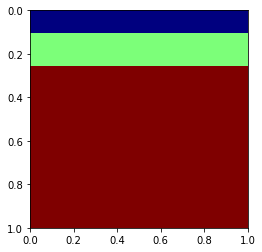

In [2]:
# Load and visualize existing tissue struct
binsize = 0.005
data = np.fromfile('tissue_OIG0RP_T.bin', dtype=np.ubyte)
print(data.shape)
print(' ')

nbins = int(np.cbrt(data.shape[0]))
tissue_vox = data.reshape(nbins, nbins, nbins)
tissue2d = tissue_vox[:,:,100]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(tissue2d, 
    extent=[0, binsize*nbins, binsize*nbins, 0], cmap='jet')
plt.show()


#### Function to create OWN tissue structure 

In [8]:
def makeTissueVox(SZ, MZ, DZ, nbins):

    '''
    SZ   : % of superficial zone
    MZ   : % of middle zone
    DZ   : % of deep zone
    nbins: number of bins
    '''

    tissue1d = []
    nSZ = int(SZ*nbins)
    nMZ = int(MZ*nbins)
    nDZ = int(DZ*nbins)
    
    for i in range(nbins):
        if i <= nSZ:
            tissue1d.append(1)
        elif i > nSZ and i <= nSZ+nMZ:
            tissue1d.append(2)
        else:
            tissue1d.append(3)
    
    tissue1d = np.asarray(tissue1d)
    tissue2d = tissue1d
    for i in range(nbins-1):
        tissue2d = np.vstack((tissue2d, tissue1d)) 
    
    tissue3d = np.transpose(tissue2d)
    for i in range(nbins-1):
        tissue3d = np.dstack((tissue3d, np.transpose(tissue2d)))
    
    return tissue3d

#### Visualize and save OWN tissue structure 

(200, 200, 200)
(200, 200)


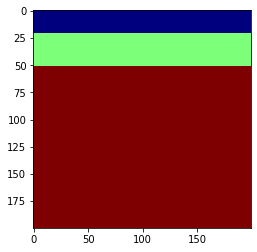

In [9]:
SZ = 0.1
MZ = 0.15
DZ = 0.75
nbins = 200

tissue3d = makeTissueVox(SZ, MZ, DZ, nbins)
print(tissue3d.shape)

tissue2d = tissue3d[:,:,100]
print(tissue2d.shape)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(tissue2d, cmap='jet')#np.transpose(tissue2d)
plt.show()

In [5]:
# Save data as binary file
tissue3d.astype('int8').tofile('pytissue_T.bin')
d = np.fromfile('pytissue_T.bin', dtype=np.ubyte)
print(d.shape)

(8000000,)


In [7]:
data = np.genfromtxt('./src_data/spectralLIB.dat', comments='%')
data.shape
data[1,:]

array([3.01e+02, 3.46e+02, 3.37e+02, 6.60e-03, 1.00e-04, 3.68e+03])

#### Load and visualize SIMULATION output file 

(512000000,)
 


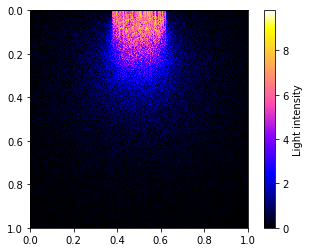

In [5]:
binsize = 0.00125
outTissue = np.fromfile('/Users/isaaa/Desktop/modelling/test_800bins/cartilage_1080_F.bin', dtype=np.float32)
print(outTissue.shape)
print(' ')
nbins = int(np.cbrt(outTissue.shape[0]))
outTissue3d = outTissue.reshape(nbins,nbins,nbins)
outTissue2d = outTissue3d[:,:,400]

fig = plt.figure()
ax = fig.add_subplot(111)
# im1 = ax.imshow(outTissue2d,vmin=0,vmax=10,cmap='gnuplot2') # cmap='jet'
im1 = ax.imshow(outTissue2d, extent = [0, binsize*nbins, binsize*nbins, 0], 
    cmap='gnuplot2')  # cmap='jet'


cbar = plt.colorbar(im1)
cbar.set_label('Light intensity')
plt.show() # check for python's imagesc function


2D shape:  (800, 800)
mean of 1D shape:  (800,)


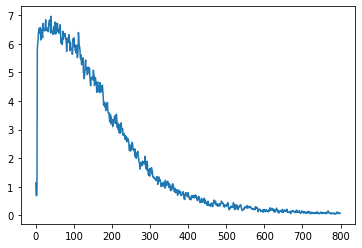

In [31]:
print('2D shape: ', outTissue2d.shape)
mn = np.mean(outTissue2d[:,390:410],axis=1)
print('mean of 1D shape: ', mn.shape)
plt.plot(np.arange(800), mn)
plt.show()

In [29]:
print(np.log(np.max(outTissue2d)))
print(outTissue2d.shape)

2.2831717
(800, 800)


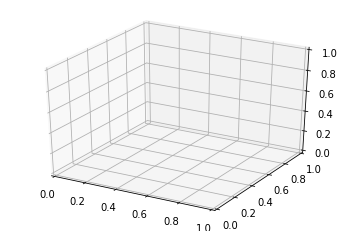

In [70]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

## Next step
-  Write xxx_H.mci file which contains the Monte Carlo simulation parameters and specifies the tissue optical properties for each tissue type. 

In [25]:
outTissue_mci = np.fromfile('./src_data/cartilage_1080_H.mci', dtype='V')
print(outTissue_mci[0])

ValueError: negative dimensions are not allowed